In [2]:
import pandas as pd
history = pd.read_csv("data/full_sensor_data.csv", parse_dates=True, index_col="UTC time")
history.columns = pd.MultiIndex.from_tuples([(c.split('_')[0], c.split('_')[1]) for c in history.columns])
history.head()

3                                         140  \
                    temperature humidity pressure pm1 pm25 pm10 temperature   
UTC time                                                                      
2017-01-01 00:00:00         NaN      NaN      NaN NaN  NaN  NaN         NaN   
2017-01-01 01:00:00         NaN      NaN      NaN NaN  NaN  NaN         NaN   
2017-01-01 02:00:00         NaN      NaN      NaN NaN  NaN  NaN         NaN   
2017-01-01 03:00:00         NaN      NaN      NaN NaN  NaN  NaN         NaN   
2017-01-01 04:00:00         NaN      NaN      NaN NaN  NaN  NaN         NaN   

                                           ...      857                \
                    humidity pressure pm1  ... pressure pm1 pm25 pm10   
UTC time                                   ...                          
2017-01-01 00:00:00      NaN      NaN NaN  ...      NaN NaN  NaN  NaN   
2017-01-01 01:00:00      NaN      NaN NaN  ...      NaN NaN  NaN  NaN   
2017-01-01 02:00:00      NaN      NaN NaN  ...      NaN NaN  NaN  NaN   
2017-01-01 03:00:00      NaN      NaN NaN  ...      NaN NaN  NaN  NaN   
2017-01-01 04:00:00      NaN      NaN NaN  ...      NaN NaN  NaN  NaN   

                            895                                  
                    temperature humidity pressure pm1 pm25 pm10  
UTC time                                                         
2017-01-01 00:00:00         NaN      NaN      NaN NaN  NaN  NaN  
2017-01-01 01:00:00         NaN      NaN      NaN NaN  NaN  NaN  
2017-01-01 02:00:00         NaN      NaN      NaN NaN  NaN  NaN  
2017-01-01 03:00:00         NaN      NaN      NaN NaN  NaN  NaN  
2017-01-01 04:00:00         NaN      NaN      NaN NaN  NaN  NaN  

[5 rows x 336 columns]

In [6]:
hist_212 = history['212']
hist_212.head()

,temperature,humidity,pressure,pm1,pm25,pm10
UTC time,,,,,,
2017-01-01 00:00:00,0.0,29.0,101435.0,107.0,123.0,196.0
2017-01-01 01:00:00,0.0,28.0,101387.0,123.0,144.0,227.0
2017-01-01 02:00:00,0.0,28.0,101302.0,120.0,140.0,224.0
2017-01-01 03:00:00,0.0,27.0,101250.0,104.0,119.0,190.0
2017-01-01 04:00:00,0.0,25.0,101204.0,88.0,100.0,161.0


In [9]:
hist_212_agg = hist_212.groupby(pd.Grouper(freq='1D')).mean()
hist_212_agg.head()

,temperature,humidity,pressure,pm1,pm25,pm10
UTC time,,,,,,
2017-01-01,1.291667,24.041667,100928.583333,84.250000,95.208333,153.541667
2017-01-02,2.541667,27.333333,100366.083333,45.333333,47.625000,87.000000
2017-01-03,2.041667,32.208333,100486.583333,24.375000,21.250000,43.000000
2017-01-04,2.625000,35.291667,98972.333333,5.708333,0.416667,6.583333
2017-01-05,-1.583333,25.291667,100565.625000,7.958333,2.750000,10.875000


In [13]:
hist_212_agg['pm1_next_day'] = hist_212_agg['pm1'].shift(-1)
hist_212_agg['pm25_next_day'] = hist_212_agg['pm25'].shift(-1)
hist_212_agg['pm10_next_day'] = hist_212_agg['pm10'].shift(-1)

hist_212_agg.head()

,temperature,humidity,pressure,pm1,pm25,pm10,pm1_next_day,pm25_next_day,pm10_next_day
UTC time,,,,,,,,,
2017-01-01,1.291667,24.041667,100928.583333,84.250000,95.208333,153.541667,45.333333,47.625000,87.000000
2017-01-02,2.541667,27.333333,100366.083333,45.333333,47.625000,87.000000,24.375000,21.250000,43.000000
2017-01-03,2.041667,32.208333,100486.583333,24.375000,21.250000,43.000000,5.708333,0.416667,6.583333
2017-01-04,2.625000,35.291667,98972.333333,5.708333,0.416667,6.583333,7.958333,2.750000,10.875000
2017-01-05,-1.583333,25.291667,100565.625000,7.958333,2.750000,10.875000,16.666667,11.708333,26.625000


In [15]:
hist_212_agg = hist_212_agg.dropna()
hist_212_agg.head()

,temperature,humidity,pressure,pm1,pm25,pm10,pm1_next_day,pm25_next_day,pm10_next_day
UTC time,,,,,,,,,
2017-01-01,1.291667,24.041667,100928.583333,84.250000,95.208333,153.541667,45.333333,47.625000,87.000000
2017-01-02,2.541667,27.333333,100366.083333,45.333333,47.625000,87.000000,24.375000,21.250000,43.000000
2017-01-03,2.041667,32.208333,100486.583333,24.375000,21.250000,43.000000,5.708333,0.416667,6.583333
2017-01-04,2.625000,35.291667,98972.333333,5.708333,0.416667,6.583333,7.958333,2.750000,10.875000
2017-01-05,-1.583333,25.291667,100565.625000,7.958333,2.750000,10.875000,16.666667,11.708333,26.625000


In [21]:
X = hist_212_agg[['temperature', 'humidity', 'pressure', 'pm1', 'pm25', 'pm10']]
y = hist_212_agg[['pm1_next_day', 'pm25_next_day', 'pm10_next_day']]

## Train/test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
y_train

,pm1_next_day,pm25_next_day,pm10_next_day
UTC time,,,
2017-10-05,7.250000,6.625000,11.375000
2017-04-29,32.666667,34.750000,50.666667
2017-02-01,81.791667,89.833333,132.958333
2017-02-06,27.875000,26.666667,45.333333
2017-06-03,15.875000,13.416667,21.791667
...,...,...,...
2017-03-13,70.166667,75.333333,109.791667
2017-04-17,10.708333,9.625000,16.333333
2017-09-28,32.666667,31.208333,53.583333


## Linear reggresion

In [28]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(X_train, y_train)

In [32]:
y_pred = regr.predict(X_test)
y_pred

array([[  9.64573681,   8.09994782,  14.16333368],
       [ 47.67119029,  49.08710557,  79.11105317],
       [ 23.28251853,  21.3609306 ,  35.88473622],
       [  2.51680404,   2.31176321,   5.22335631],
       [ 26.29053157,  24.29498597,  41.48021109],
       [ 23.69918847,  23.29291349,  38.19018644],
       [ 38.32505369,  37.74022499,  67.95695103],
       [ 22.23265423,  19.56929309,  34.70540305],
       [ 17.38141573,  15.82203071,  26.58279183],
       [ 18.93484828,  21.02100249,  30.19250138],
       [ 38.01045175,  38.69004681,  61.56564939],
       [  2.59034279,   1.7971659 ,   4.62053478],
       [ 13.11546578,  11.62865168,  19.37753108],
       [ 22.50437313,  20.88461045,  35.71792271],
       [ 31.77947496,  33.66647154,  49.84268516],
       [ 16.99491558,  19.20439842,  27.73853666],
       [ 12.47095596,  10.1481432 ,  17.6528904 ],
       [ 10.46222894,   9.54586376,  15.97583032],
       [ 16.29316127,  13.85635704,  24.52429698],
       [ 26.62947674,  31.65025

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 357.91
Coefficient of determination: 0.60


In [41]:
results = abs(y_test - y_pred) / y_test

In [42]:
results.describe()

,pm1_next_day,pm25_next_day,pm10_next_day
count,119.000000,119.000000,119.000000
mean,0.389868,0.466558,0.418897
std,0.402386,0.497582,0.432318
min,0.001013,0.008771,0.005000
25%,0.150685,0.167026,0.161238
50%,0.302743,0.311440,0.295226
75%,0.477580,0.551597,0.481127
max,3.091179,3.582630,3.373939


119

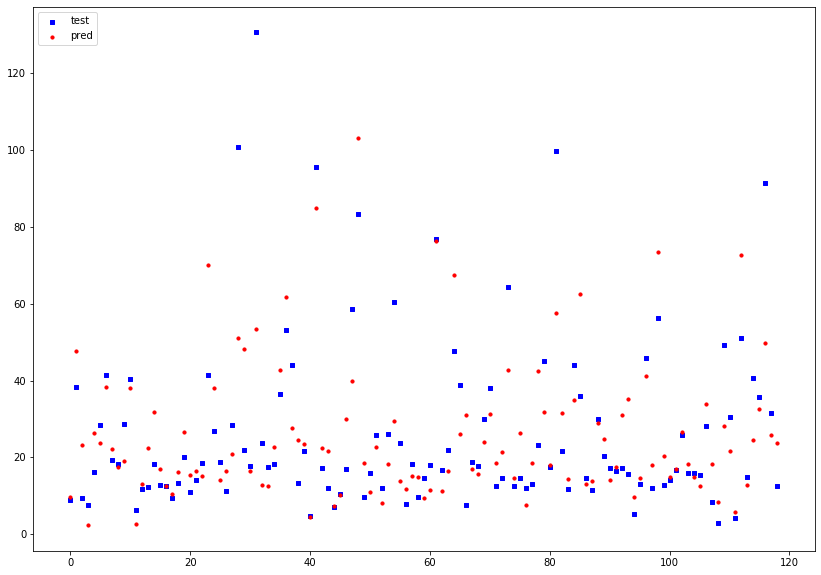

In [62]:
import matplotlib.pyplot as plt

x = range(len(y_test))

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111)

ax1.scatter(x, y_test.to_numpy()[:, 0], s=10, c='b', marker="s", label='test')
ax1.scatter(x, y_pred[:, 0], s=10, c='r', marker="o", label='pred')
plt.legend(loc='upper left');
plt.show()

In [ ]:


plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()